## Data Analysis on Wild Fires in California


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vivekattri/california-wildfire-damage-2014-feb2025")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/vivekattri/california-wildfire-damage-2014-feb2025/versions/1


In [2]:
import os
print(os.listdir(path))

['California Wildfire Damage.csv']


The recent california's fires are huge. According to World Vision, it is stated that around 23,400 acres of land including homes and businesses are burnt only in year 2025. But as we know wildfires are not new to california. The worst wild fire that took place in california is the "August Complex" happened due to lighting burnt over all land of 1,032,648 acres started in August 2020. Let us study more about the destructions caused by wild fires and the financial losses the state has endured due to it from 2014 to 2025. The dataset to know more about the wildfires is taken from kaggle (https://www.kaggle.com/datasets/vivekattri/california-wildfire-damage-2014-feb2025)

In [3]:
import pandas as pd

csv_file = os.path.join(path, 'California Wildfire Damage.csv')
data = pd.read_csv(csv_file)
print(data.head())

  Incident_ID        Date       Location  Area_Burned (Acres)  \
0     INC1000  2020-11-22  Sonoma County                14048   
1     INC1001  2021-09-23  Sonoma County                33667   
2     INC1002  2022-02-10  Shasta County                26394   
3     INC1003  2021-05-17  Sonoma County                20004   
4     INC1004  2021-09-22  Sonoma County                40320   

   Homes_Destroyed  Businesses_Destroyed  Vehicles_Damaged  Injuries  \
0              763                   474               235        70   
1             1633                     4               263       100   
2              915                   291                31        50   
3             1220                   128                34        28   
4              794                   469               147         0   

   Fatalities  Estimated_Financial_Loss (Million $)           Cause  
0          19                               2270.57       Lightning  
1           2                       

Let us now know more about the given data. To study about the data we need to first know the type of the data. We see that the type of Date is object. But we want date to be datetime data type and extract year from the date which will help us in our further analysis

In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data.dtypes

,0
Incident_ID,object
Date,datetime64[ns]
Location,object
Area_Burned (Acres),int64
Homes_Destroyed,int64
Businesses_Destroyed,int64
Vehicles_Damaged,int64
Injuries,int64
Fatalities,int64
Estimated_Financial_Loss (Million $),float64


In [5]:
data.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning,2020,11
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning,2021,9
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity,2022,2
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown,2021,5
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown,2021,9


We also see there are no value missing values in the given data set

In [6]:
data.isnull().sum()

,0
Incident_ID,0
Date,0
Location,0
Area_Burned (Acres),0
Homes_Destroyed,0
Businesses_Destroyed,0
Vehicles_Damaged,0
Injuries,0
Fatalities,0
Estimated_Financial_Loss (Million $),0


### Feature Description
Incident ID: It is the unique identifier for all the wildfire incidents <br>
Date: Date on which incident happened <br>
Location: Place at where the wildfire took place <br>
Area_Burned(Acres): Area that is burnt in acres <br>
Homes_Destroyed: No.of homes that got destroyed <br>
Businesses_Destroyed: No.of business that got destroyed <br>
Vehicles_Destroyed: No.of Vehicles that got destroyed <br>
Injuries: No.of people who got injuried <br>
Fatalities: No.of fatalities that got damaged <br>
Estimated_Financial_Loss (Million $): Financial loss in millions <br>
Cause: Cause of wild fire <br>
Year: When the wild fire happened <br>

As Incident ID will not play any significant role in analysis, it can be removed





In [7]:
data.drop(columns=['Incident_ID'], inplace=True)

Now let us first see what is the main reason why wild fires occurs majority of times

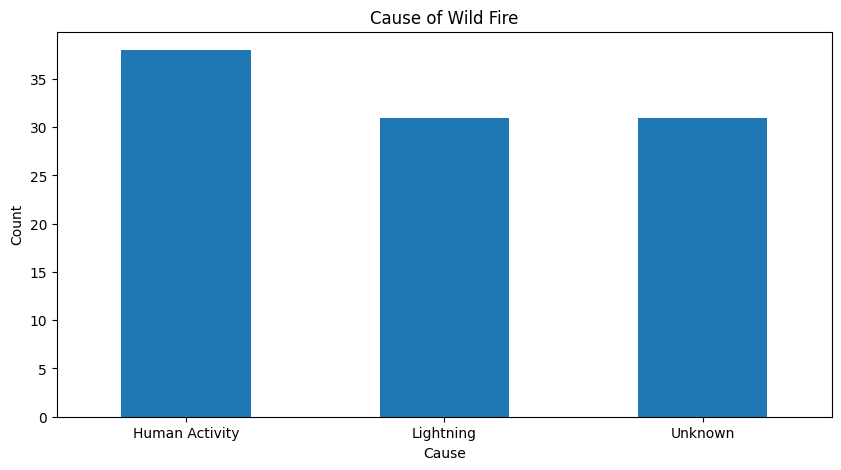

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
(data.groupby(["Cause"]).size()).plot(kind="bar",title="Cause of Wild Fire")
plt.xlabel("Cause")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Majority of the wild fires are caused by Human Activity followed by Lighting cause and Unknown, which are nearly the same. Let us also see which place has more number of wild fires from 2014 to 2025

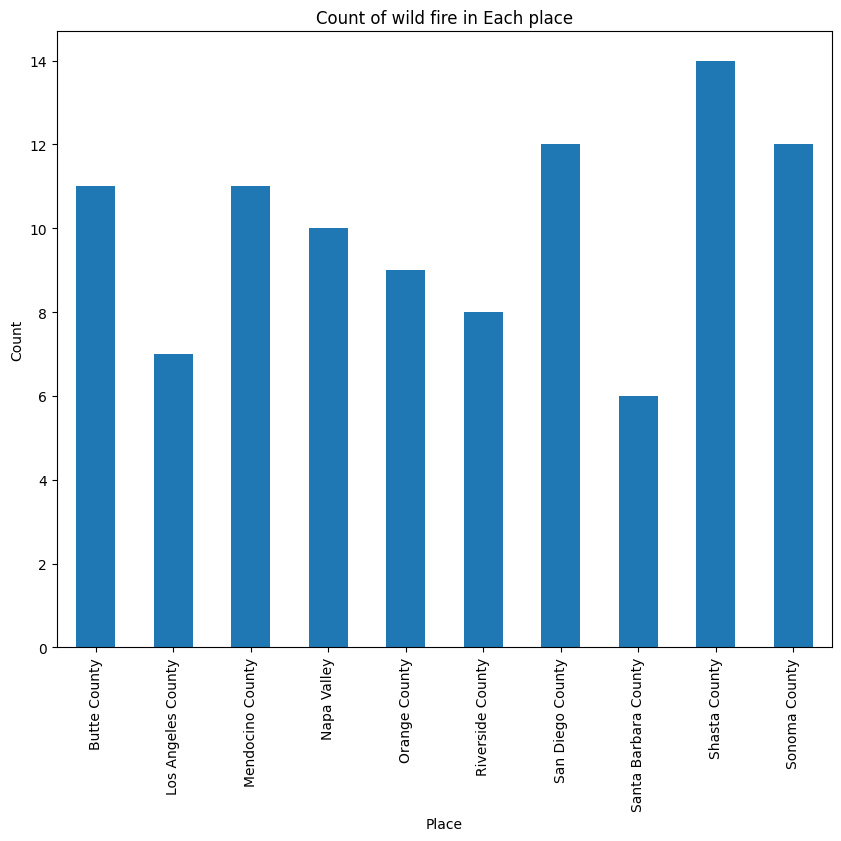

In [9]:
plt.figure(figsize=(10, 8))
(data.groupby(["Location"]).size()).plot(kind="bar",title="Count of wild fire in Each place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

We see that there are a lot of wild fires in Shasta County from 2014-2025 when compared to other counties in california. Let us combine the above two graphs to see the cause of wildfires in all the counties mentioned.

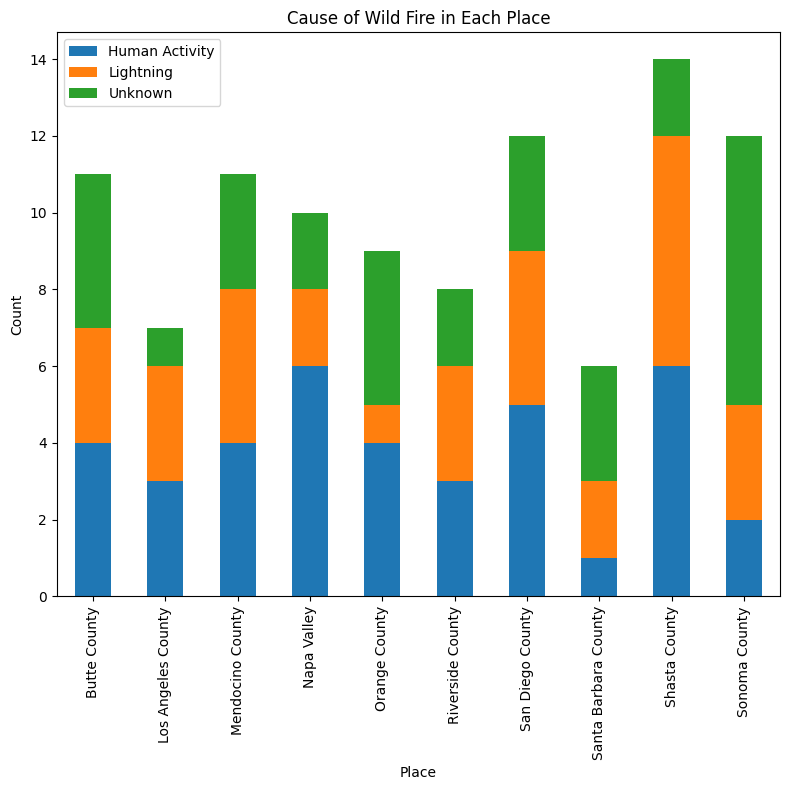

In [10]:
fig = plt.figure(figsize=(8, 8))
axes = fig.add_subplot(111)

cause_count = data.groupby(["Location","Cause"]).size().unstack()

cause_count.plot(kind="bar",stacked=True, ax=axes)
axes.set_xlabel("Place")
axes.set_ylabel("Count")
axes.set_title("Cause of Wild Fire in Each Place")
plt.xticks(rotation=90)
plt.legend(loc='upper left')
fig.tight_layout()
plt.show()

The causes vary from county to county. If we see Shasta County in which there are most number of wild fires, majority of the reason why there are wild fires is because of Lighting then followed by Human Activity. <br>


Now let us check which month has more number of wildfires from 2014 to 2025

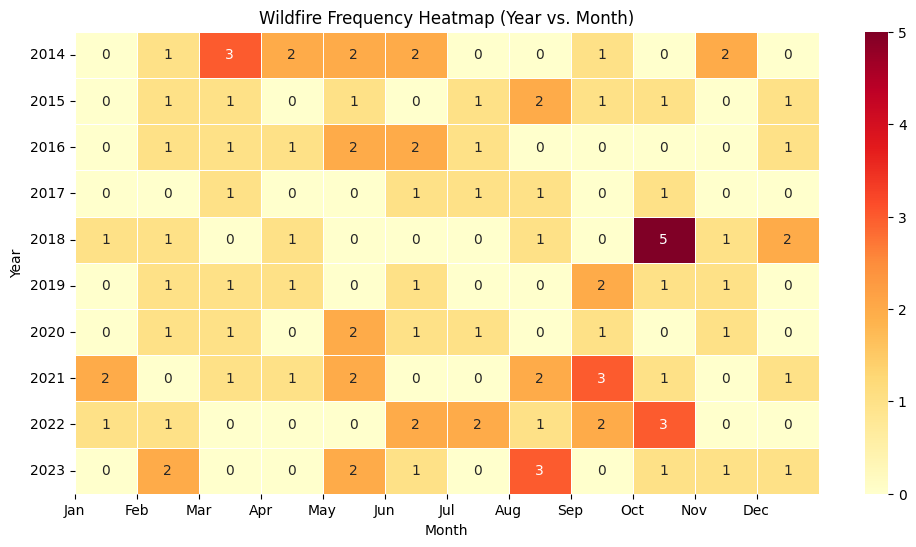

In [11]:
heatmap_data = data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d", linewidths=0.5)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Wildfire Frequency Heatmap (Year vs. Month)")
plt.xticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=0)
plt.yticks(rotation=0)
plt.show()

From the above heatmap, we can see that there are 5 wildfire in the month of October in 2018 following 3 wildfires in Augest 2023, September 2021, October 2022.   

Let us know see the average final loss that happened due wildfires each year, in each county and also find the maximum of average loss

In [12]:
data.groupby(["Year","Location"])["Estimated_Financial_Loss (Million $)"].mean()

Year  Location            
2014  Butte County            1975.260000
      Los Angeles County        85.570000
      Mendocino County         423.526667
      Napa Valley             3692.205000
      San Diego County        2754.970000
                                 ...     
2023  Riverside County        2952.170000
      San Diego County        1168.160000
      Santa Barbara County    2241.955000
      Shasta County           3654.420000
      Sonoma County           2209.920000
Name: Estimated_Financial_Loss (Million $), Length: 65, dtype: float64

In [106]:
d1=data.groupby(["Year","Location"])["Estimated_Financial_Loss (Million $)"].mean()
max1=data.groupby(["Year","Cause","Location"])["Estimated_Financial_Loss (Million $)"].mean().max()
d1[d1==max1]

,,Estimated_Financial_Loss (Million $)
Year,Location,
2019,Butte County,4866.99


The maximum average financial loss happened in Butte county in 2019

Let us see maximum Area burned, injuries, Homes_destroyed, Business_destroyed, Vehicles destroyed and facilities

In [107]:
data[data['Area_Burned (Acres)'].max() == data['Area_Burned (Acres)']]

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
89,INC1089,2016-05-15,Shasta County,49653,1417,318,70,20,17,4059.9,Lightning,2016,5


In [108]:
data[data["Homes_Destroyed"].max() == data["Homes_Destroyed"]]

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
90,INC1090,2014-11-16,Mendocino County,22675,1968,312,37,84,4,416.63,Lightning,2014,11


In [109]:
data[data["Businesses_Destroyed"].max() == data["Businesses_Destroyed"]]

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
15,INC1015,2022-06-08,Los Angeles County,3668,142,493,32,26,19,3576.23,Lightning,2022,6


In [110]:
data[data["Vehicles_Damaged"].max() == data["Vehicles_Damaged"]]

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
14,INC1014,2016-03-22,Napa Valley,17421,1161,319,300,97,16,1488.8,Unknown,2016,3
50,INC1050,2022-06-25,Butte County,25558,903,162,300,48,14,3373.0,Lightning,2022,6


In [111]:
data[data["Injuries"].max() == data["Injuries"]]

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning,2021,9
21,INC1021,2015-03-20,Mendocino County,45742,1812,37,45,100,6,2745.19,Lightning,2015,3
61,INC1061,2014-03-28,Los Angeles County,11162,544,223,196,100,8,85.57,Unknown,2014,3
97,INC1097,2016-05-18,Shasta County,11863,702,9,40,100,1,1474.78,Human Activity,2016,5


In [112]:
data[data["Fatalities"].max() == data["Fatalities"]]

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
99,INC1099,2021-03-20,Mendocino County,44299,1217,172,176,81,20,4276.78,Human Activity,2021,3


###Correlationship between all the variables

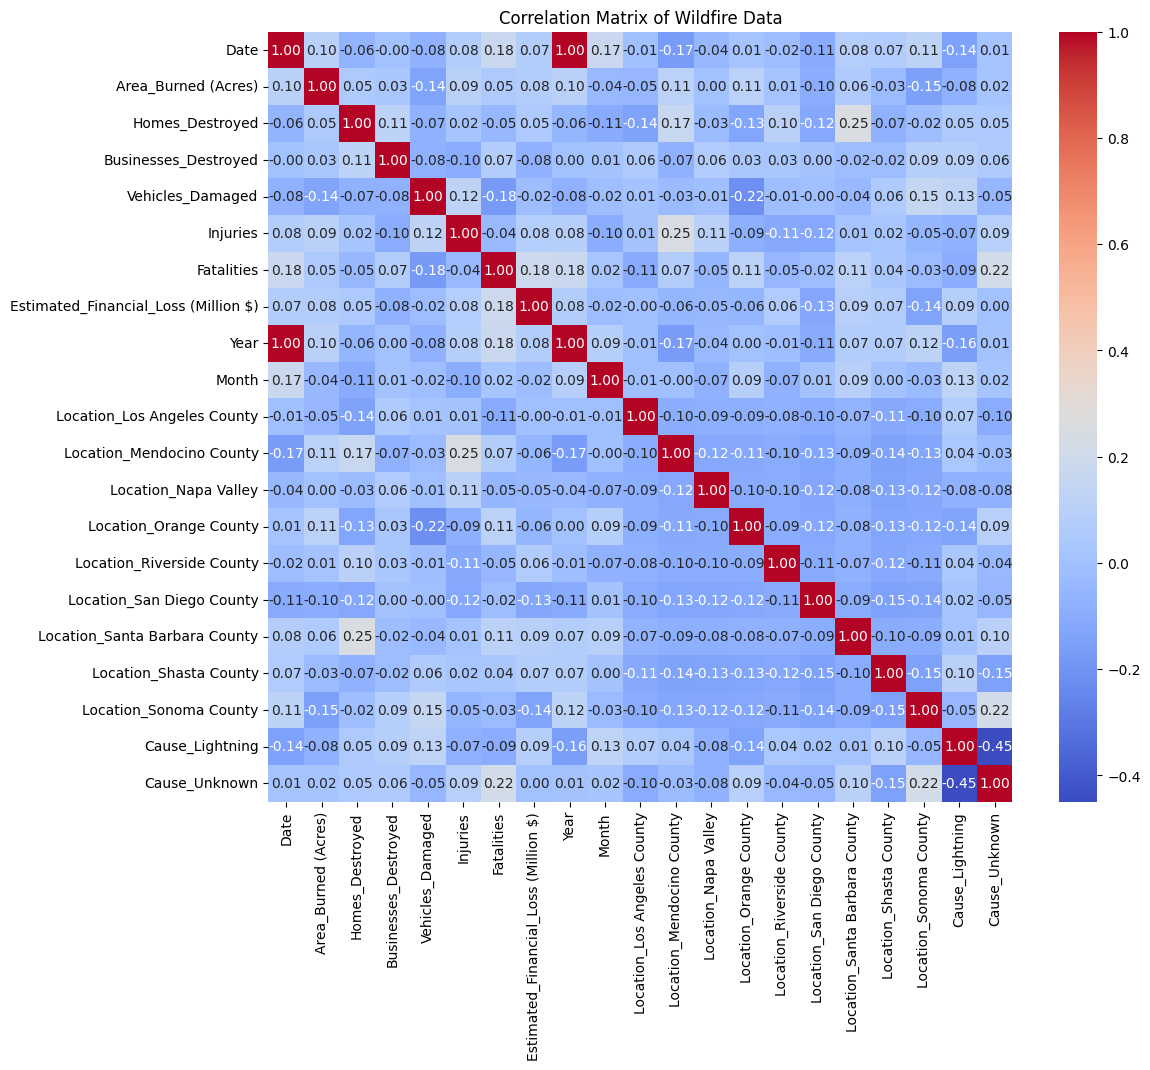

In [13]:
data_cat = pd.get_dummies(data, columns=['Location', 'Cause'], drop_first=True)
plt.figure(figsize=(12, 10))
sns.heatmap(data_cat.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wildfire Data')
plt.show()

The variables are not linearly related to each other as we see the correlation between most of the variables is more greater than 0.5 to say they are positively correlated and less than -0.5 to say they are negetively corelated. Whatever  correlation of 1 we are seeing is between Date and month, Date and year which we do not consider. As month and year are extracted from date.

### Linear Relation between Cause and Population
Though majority of the times Human activities caused wild fires in california, we see that in a county like Santa Barbara, very less number of wild fires are caused by Human activities. Population might also be one of the reasons why wild fire is caused by Human Activity. Let us see if the population of the county is the reason for cause of wild fire. Let us fetch the details of population of counties. The population of each county is taken as per the records of 2020 which is the available data on the wikipedia page.

In [36]:
county_name = data["Location"].unique()
county_name

array(['Sonoma County', 'Shasta County', 'Butte County',
       'San Diego County', 'Napa Valley', 'Riverside County',
       'Santa Barbara County', 'Los Angeles County', 'Mendocino County',
       'Orange County'], dtype=object)

In [57]:
from bs4 import BeautifulSoup
import requests

url = "https://en.wikipedia.org/wiki/List_of_counties_in_California"
resp_q1 = requests.get(url)
soup_q1 = BeautifulSoup(resp_q1.text, 'html5lib')

table = soup_q1.find('table', class_='wikitable')
df_list = pd.read_html(str(table))  # Extract all tables
county_df = df_list[0]

filtered_data = county_df[county_df.iloc[:, 0].isin(county_name)]  # Adjust column index if needed

print(filtered_data)

                  County  FIPS code[8] County seat[9]  Est.[9]  \
3           Butte County             7       Oroville     1850   
18    Los Angeles County            37    Los Angeles     1850   
22      Mendocino County            45          Ukiah     1850   
29         Orange County            59      Santa Ana     1889   
32      Riverside County            65      Riverside     1893   
36      San Diego County            73      San Diego     1850   
41  Santa Barbara County            83  Santa Barbara     1850   
44         Shasta County            89        Redding     1850   
48         Sonoma County            97     Santa Rosa     1850   

                     Formed from  \
3                       original   
18                      original   
22                      original   
29                   Los Angeles   
32  San Bernardino and San Diego   
36                      original   
41                      original   
44                      original   
48             

<ipython-input-57-91c5b0b4dd51>:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_list = pd.read_html(str(table))  # Extract all tables


We were not able to fetch Napa county population. So we will enter those details into out dataframe manually

In [58]:
filtered_data = filtered_data[['County', 'Population (2023)[11]']]
new_row = pd.DataFrame({'County': ['Napa Valley'], 'Population (2023)[11]': [138019]})
filtered_data = pd.concat([filtered_data, new_row], ignore_index=True)
filtered_data = filtered_data.rename(columns={"Population (2023)[11]":"Population"})
filtered_data


,County,Population
0,Butte County,207172
1,Los Angeles County,9663345
2,Mendocino County,89108
3,Orange County,3135755
4,Riverside County,2492442
5,San Diego County,3269973
6,Santa Barbara County,441257
7,Shasta County,180366
8,Sonoma County,481812
9,Napa Valley,138019


Now let us add the population data to our existing data and create a new dataframe called as population_data. To check if there is any relation between population and the wildfire caused by humans', we need to count the number of times the Human Activity, Lighting and Unknown were the cause of wildfire. After that we will filter out the wildfire caused by humans and check the correlation.

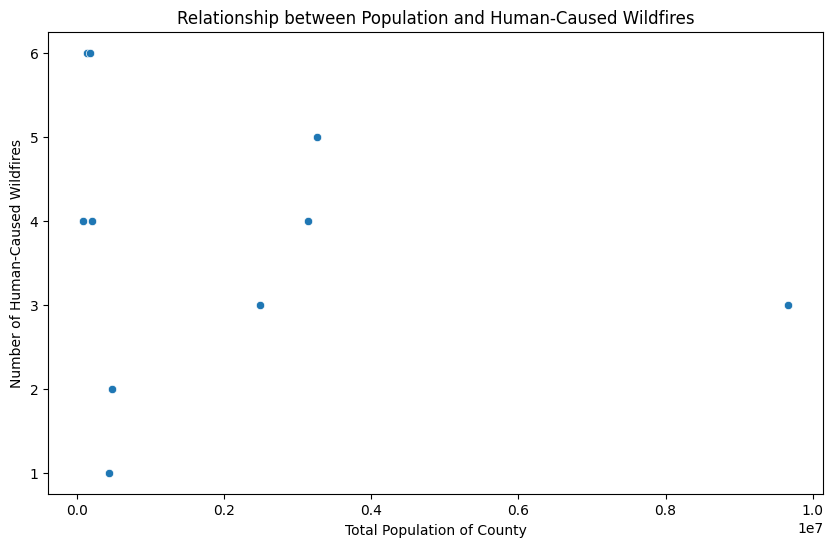

Correlation between population and number of wildfires caused by humans: -0.14974184558149983


In [90]:
population_data = pd.merge(data, filtered_data, left_on='Location', right_on='County', how='left')

cause_count = population_data.groupby(['Location', 'Cause']).size().reset_index(name='Count')
cause_count = cause_count.merge(filtered_data, left_on='Location', right_on='County', how='left')
cause_count

human_caused = cause_count[cause_count['Cause'] == 'Human Activity']
human_caused

plt.figure(figsize=(10, 6))
sns.scatterplot(data=human_caused, x='Population', y='Count')
plt.xlabel('Total Population of County')
plt.ylabel('Number of Human-Caused Wildfires')
plt.title('Relationship between Population and Human-Caused Wildfires')
plt.show()

correlation = human_caused['Population'].corr(human_caused['Count'])
print(f"Correlation between population and number of wildfires caused by humans: {correlation}")

The correlation between population and number of wildfires caused by humans is -0.149, which is very less. Hence we can that there is no relation between wildfire caused by human and Population of the county. But when we see the graph,it conveys different meaning. Counties with less population have more wildfires caused by Human Activity than the county with more population. We might need more data to confirm this.

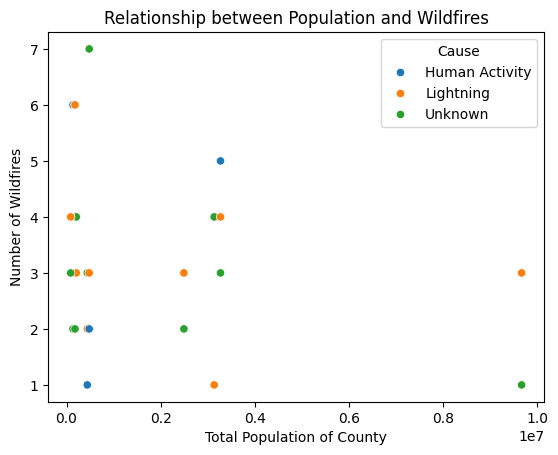

In [91]:
sns.scatterplot(data=cause_count, x='Population', y='Count',hue='Cause')
plt.xlabel('Total Population of County')
plt.ylabel('Number of Wildfires')
plt.title('Relationship between Population and Wildfires')
plt.show()

Irrespective of the cause of wildfire, there are more number of wildfires in the smaller counties than the larger ones. Let us do hypothesis testing to confirm this. <br>

 **Null Hypothesis**: The number of wildfires in small and large counties is the same<br>
 **Alternate Hypothesis**: Smaller counties have more wildfires than larger counties

In [92]:
import numpy as np

median_population = population_data['Population'].median()
population_data['small/large'] = np.where(population_data['Population'] <= median_population, 'Small', 'Large')
population_data.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,County,Population,small/large
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning,2020,Sonoma County,481812,Large
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning,2021,Sonoma County,481812,Large
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity,2022,Shasta County,180366,Small
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown,2021,Sonoma County,481812,Large
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown,2021,Sonoma County,481812,Large


In [99]:
cause_count = population_data.groupby(['Location', 'Cause']).size().reset_index(name='Count')

#population_data = population_data.merge(cause_count, on=['Location', 'Cause'], how='left')
small_counties = population_data[population_data['small/large'] == 'Small']['Count']
large_counties = population_data[population_data['small/large'] == 'Large']['Count']

In [100]:
from scipy.stats import shapiro

print("Shapiro test for small counties:", shapiro(small_counties))
print("Shapiro test for large counties:", shapiro(large_counties))

Shapiro test for small counties: ShapiroResult(statistic=0.8571526370535478, pvalue=1.753646093301721e-05)
Shapiro test for large counties: ShapiroResult(statistic=0.8714973636168823, pvalue=8.528409615019208e-05)


In [101]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(small_counties, large_counties, alternative='greater')
print("U-statistic:", u_stat)
print("p-value:", p_value)

U-statistic: 1386.0
p-value: 0.16525263394068768


In [ ]:
data["Month"] = data["Date"].dt.month
data.head()

,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause,Year,Month
0,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning,2020,11
1,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning,2021,9
2,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity,2022,2
3,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown,2021,5
4,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown,2021,9


###Trend Plots

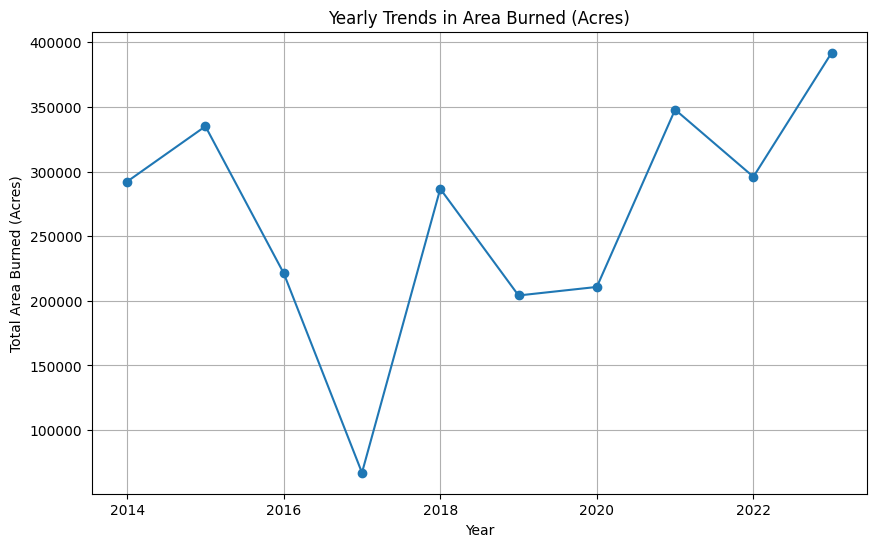

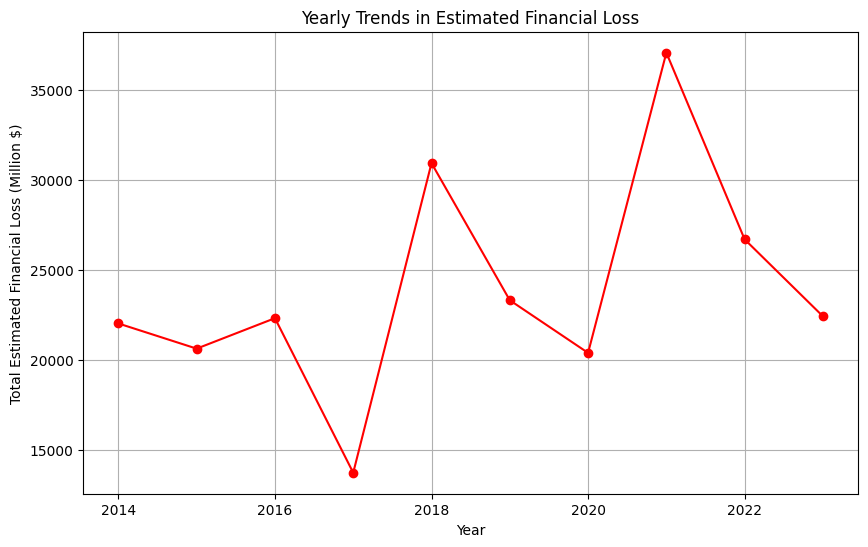

In [ ]:
yearly_trends_area = data.groupby('Year')['Area_Burned (Acres)'].sum()
yearly_trends_loss = data.groupby('Year')['Estimated_Financial_Loss (Million $)'].sum()


plt.figure(figsize=(10, 6))
yearly_trends_area.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Area Burned (Acres)')
plt.title('Yearly Trends in Area Burned (Acres)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
yearly_trends_loss.plot(kind='line', marker='o', color='red')
plt.xlabel('Year')
plt.ylabel('Total Estimated Financial Loss (Million $)')
plt.title('Yearly Trends in Estimated Financial Loss')
plt.grid(True)
plt.show()